### Data Science Programming 2

# Final Project 

Team Members: Amina Tasbulatova,Zhaniya Bekzhan,Zhanel Naukhanova

## Tasks:
### Task 1 - Classification with prepared dataset (75% of mark)
### Task 2 - Clustering with any dataset (25% of mark)

## Marking scheme 
For Final:
1. Data and task presentation - 10%
2. Data Preprocessing - 20%
3. Model (variety, complexity, tunning) - 20%
4. Imbalance (approaching this issue) - 20%
5. Code quality - 10%
6. Results and Defence - 20%

*Note: add comments and description of the approaches that you use, for example, for resolving the problem of imbalanced data. Write descriptions of techniques that you apply, and you should understand them as well.*

## Task 1:
Мы постоянно работаем над улучшением качества своих продуктов и услуг для роста абонентской базы и минимизации оттока. В своей работе мы используем персональный подход к абонентам.
Для снижения оттока компания использует разные каналы коммуникации с клиентами. Каждое предложение должно быть адресовано определенной целевой группе. В этом задании вам предстоит по имеющимся данным попытаться определить абонентов, которые уйдут в отток.

**Что имеем**

Анонимизированные данные об абонентах: язык обслуживания абонента, тарифный план, информация об объёмах потребления различных услуг оператора и другие.
В файле data.csv содержится информация для построения модели.
Формат строк: 3 категориальных признака (C1, C2, C3), 23 числовых признака (N1, …, N23) и целевая переменная — TARGET.

**Что делать**

Описать этапы построения модели, построить модель, оценить ее и рассказать бизнесу как ее применять, то есть нужна бизнес-интерпретация. 

*Note: this is how the task was originally structured, you can use it as a guidance.*

In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

### Data and task presentation

In [23]:
df = pd.read_csv('task1.csv', sep=';', decimal=",")
df.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,...,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,...,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,...,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,...,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,...,28,17,5,69,23,86,28,0,0,0


In [24]:
# basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514009 entries, 0 to 514008
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      514009 non-null  int64  
 1   C2      514009 non-null  int64  
 2   C3      514009 non-null  int64  
 3   N1      514009 non-null  float64
 4   N2      514009 non-null  float64
 5   N3      514009 non-null  float64
 6   N4      514009 non-null  float64
 7   N5      514009 non-null  float64
 8   N6      514009 non-null  float64
 9   N7      514009 non-null  float64
 10  N8      514009 non-null  float64
 11  N9      514009 non-null  float64
 12  N10     514009 non-null  float64
 13  N11     514009 non-null  float64
 14  N12     514009 non-null  float64
 15  N13     514009 non-null  float64
 16  N14     514009 non-null  int64  
 17  N15     514009 non-null  int64  
 18  N16     514009 non-null  int64  
 19  N17     514009 non-null  int64  
 20  N18     514009 non-null  int64  
 21  N19     51

In [25]:
df.shape

(514009, 27)

### Data exploration

In [26]:
df.isnull().sum().sum()

0

In [5]:
df.duplicated().sum().sum()

0

In [6]:
# descriptive stats for the numerical values in the dataset
df.describe()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
count,5.140090e+05,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,...,514009.000000,514009.000000,514009.000000,514009.00000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000
mean,3.125269e+15,327890.745425,31.630411,44.571923,934.872724,2875.756859,108.307058,62.711117,12.868516,9.464795,...,29.079176,10.447070,7.747530,38.66520,21.243424,49.609273,29.059777,0.046978,0.019398,0.049307
std,8.589417e+14,51107.511245,0.929149,232.708320,2272.072942,4932.847144,197.771895,99.919667,19.511682,16.725490,...,31.241034,14.888752,11.964678,50.26614,24.155985,58.757945,31.233367,0.708441,0.349181,0.216507
min,3.530330e+05,3138.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.231393e+15,323531.000000,31.000000,0.000000,0.000000,0.000000,2.800000,9.580000,0.000000,0.220000,...,8.000000,0.000000,1.000000,2.00000,4.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,3.337374e+15,343230.000000,31.000000,0.000000,77.460000,109.600000,45.000000,33.020000,4.970000,3.300000,...,20.000000,5.000000,4.000000,21.00000,14.000000,32.000000,20.000000,0.000000,0.000000,0.000000
75%,3.437364e+15,343636.000000,33.000000,0.560000,785.780000,4247.730000,132.020000,77.500000,18.350000,11.570000,...,40.000000,15.000000,10.000000,56.00000,30.000000,73.000000,40.000000,0.000000,0.000000,0.000000
max,3.536383e+15,353036.000000,33.000000,27971.110000,96905.370000,201234.910000,9197.630000,5192.670000,441.880000,999.780000,...,1258.000000,430.000000,499.000000,1109.00000,1024.000000,1346.000000,1258.000000,118.000000,99.000000,1.000000


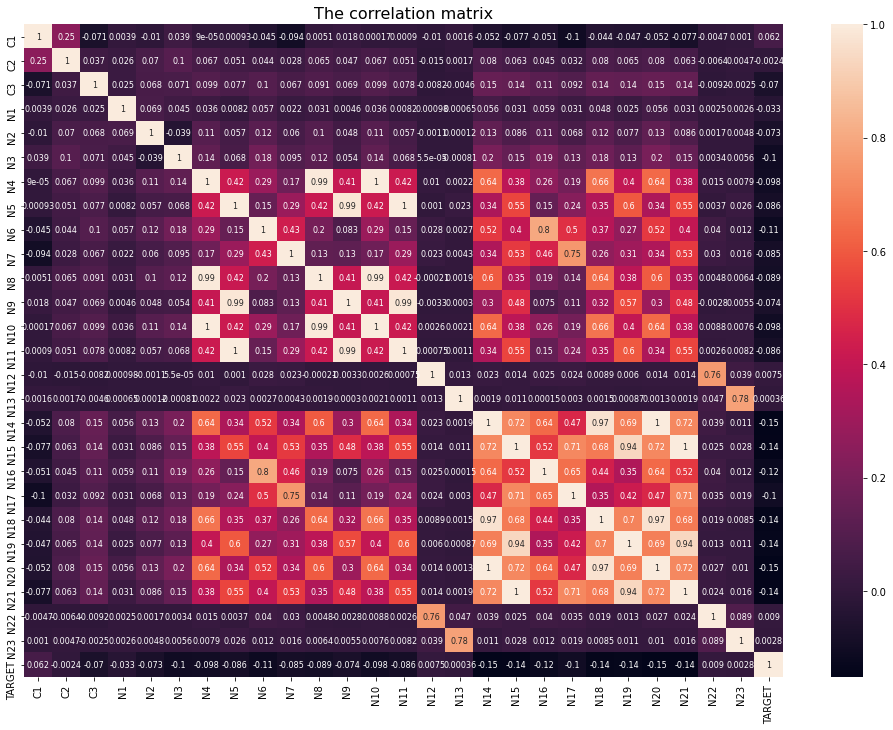

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(17,12))
sns.heatmap(df.corr(), annot_kws={'size':8}, ax=ax, annot=True)
ax.set_title('The correlation matrix', fontsize=16)
plt.show()

In [9]:
df.dtypes

C1          int64
C2          int64
C3          int64
N1        float64
N2        float64
N3        float64
N4        float64
N5        float64
N6        float64
N7        float64
N8        float64
N9        float64
N10       float64
N11       float64
N12       float64
N13       float64
N14         int64
N15         int64
N16         int64
N17         int64
N18         int64
N19         int64
N20         int64
N21         int64
N22         int64
N23         int64
TARGET      int64
dtype: object

### Data preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder 

# encode categorical values to numerical by LabelEncoder 
df['C1']= LabelEncoder().fit_transform(df['C1'].astype(str)) 
df['C2']= LabelEncoder().fit_transform(df['C2'].astype(str)) 
df['C3']= LabelEncoder().fit_transform(df['C3'].astype(str)) 

df.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,63228,26,2,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,...,7,0,0,36,7,36,7,0,0,0
1,355624,57,0,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,...,18,5,6,52,12,57,18,0,0,0
2,17477,26,2,0.00,31.95,763.19,48.13,77.22,9.33,4.90,...,24,18,6,46,18,64,24,0,0,0
3,270006,46,0,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,...,57,4,1,142,56,148,57,0,0,0
4,117787,57,0,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,...,28,17,5,69,23,86,28,0,0,0


### Model

### 1. Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split

x = df.drop('TARGET', axis = 1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [14]:
# standardization technique 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

auc1 = roc_auc_score(y_test, y_pred)
print("Roc Auc Score:", auc1)

accuracy1 = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy1*100)

Roc Auc Score: 0.5000555752166215
Accuracy: 95.07143181390764


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)

auc2 = roc_auc_score(y_test, y_pred2)
print("Roc Auc Score:", auc2)

accuracy2 = accuracy_score(y_test, y_pred2)
print('Accuracy:', accuracy2*100)

Roc Auc Score: 0.6262623805576776
Accuracy: 88.60138907803349


In [28]:
#from sklearn.ensemble import RandomForestClassifier

#rfc = RandomForestClassifier().fit(X_train, y_train)
#y_pred1 = rfc.predict(X_test)
#auc3 = roc_auc_score(y_test, y_pred1)

#print("Roc Auc Score:", auc3)
#accuracy3 = accuracy_score(y_test, y_pred1)
#print('Accuracy:', accuracy3*100)

### Imbalance

We implemented an oversampling technique. In particular, we used SMOTE and started to train the classification models.

In [31]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

rfc_imb = LogisticRegression().fit(X_res, y_res)
rfc_imb_pred = rfc_imb.predict(X_test)

# evaluate model
auc_imb = roc_auc_score(y_test, rfc_imb_pred)
print("Roc Auc Score:", auc_imb)

accuracy_imb = accuracy_score(y_test, rfc_imb_pred)
print('Accuracy:', accuracy_imb*100)

Roc Auc Score: 0.767237113210599
Accuracy: 69.68022671413657


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Conclusion

There are data investigation, preprocessing and modeling parts in this part of the project. The models chosed in this dataset are:
+ Logistic Regression
+ Random Forest Classifier

The following analysis is beneficial for the specialized companies whether the customers will stay on their side or change to another operator. By using this prediction model, the company may optimize their work process as well as improve their customer service so that the abonents stay with them.

## Task 2:
1. Select any dataset that will suit for clustering
2. Observe your data
3. Apply some data preparation
4. Apply clustering model
5. Visualise your obtained clusters

In [27]:
df2 = pd.read_excel('task2_clustering.xlsx')
df2.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,-0.501163,-7.255475,-5.572167,-1.805756,-1.591788,7.309525,-6.865964,0.689374,1.059544,-9.284560
1,2.129898,-6.030686,-4.523330,-3.016737,-1.476348,4.291699,-6.780570,0.334200,2.054573,-9.941892
2,-2.173184,9.295427,5.713340,0.841088,-6.221385,-6.348730,-8.966260,7.628342,2.948812,4.946535
3,-9.149524,9.426631,6.372079,-5.774996,-5.671090,-6.380030,-4.059996,0.283833,-2.255232,-3.239336
4,3.177287,-5.794053,-3.438450,-0.885736,-0.407087,4.826428,-7.255387,-0.543231,1.440112,-9.680664


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    9500 non-null   float64
 1   var2    9500 non-null   float64
 2   var3    9500 non-null   float64
 3   var4    9500 non-null   float64
 4   var5    9500 non-null   float64
 5   var6    9500 non-null   float64
 6   var7    9500 non-null   float64
 7   var8    9500 non-null   float64
 8   var9    9500 non-null   float64
 9   var10   9500 non-null   float64
dtypes: float64(10)
memory usage: 742.3 KB


In [29]:
df.describe()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
count,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,...,514009.000000,514009.000000,514009.000000,514009.00000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000
mean,257004.000000,37.391766,0.630411,44.571923,934.872724,2875.756859,108.307058,62.711117,12.868516,9.464795,...,29.079176,10.447070,7.747530,38.66520,21.243424,49.609273,29.059777,0.046978,0.019398,0.049307
std,148381.761595,16.273859,0.929149,232.708320,2272.072942,4932.847144,197.771895,99.919667,19.511682,16.725490,...,31.241034,14.888752,11.964678,50.26614,24.155985,58.757945,31.233367,0.708441,0.349181,0.216507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128502.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2.800000,9.580000,0.000000,0.220000,...,8.000000,0.000000,1.000000,2.00000,4.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,257004.000000,43.000000,0.000000,0.000000,77.460000,109.600000,45.000000,33.020000,4.970000,3.300000,...,20.000000,5.000000,4.000000,21.00000,14.000000,32.000000,20.000000,0.000000,0.000000,0.000000
75%,385506.000000,51.000000,2.000000,0.560000,785.780000,4247.730000,132.020000,77.500000,18.350000,11.570000,...,40.000000,15.000000,10.000000,56.00000,30.000000,73.000000,40.000000,0.000000,0.000000,0.000000
max,514008.000000,63.000000,2.000000,27971.110000,96905.370000,201234.910000,9197.630000,5192.670000,441.880000,999.780000,...,1258.000000,430.000000,499.000000,1109.00000,1024.000000,1346.000000,1258.000000,118.000000,99.000000,1.000000


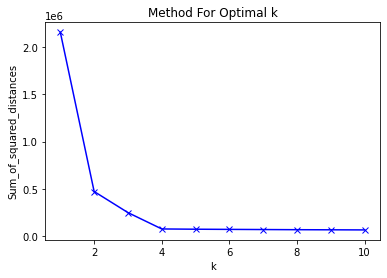

In [38]:
# using elbow rule identifying how many clusters needed 
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Method For Optimal k')
plt.show()

Based on the graph above, optimal k = 4. It will be used for Kmeans in the code below. 

In [35]:
# applying kmeans with k=4
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

# make predictions
y_kmeans = kmeans.predict(X)
y_kmeans

array([1, 1, 2, ..., 1, 0, 0])

In [36]:
# labels

labels = kmeans.labels_
labels

array([1, 1, 2, ..., 1, 0, 0])

Text(0.5, 1.0, 'PCA')

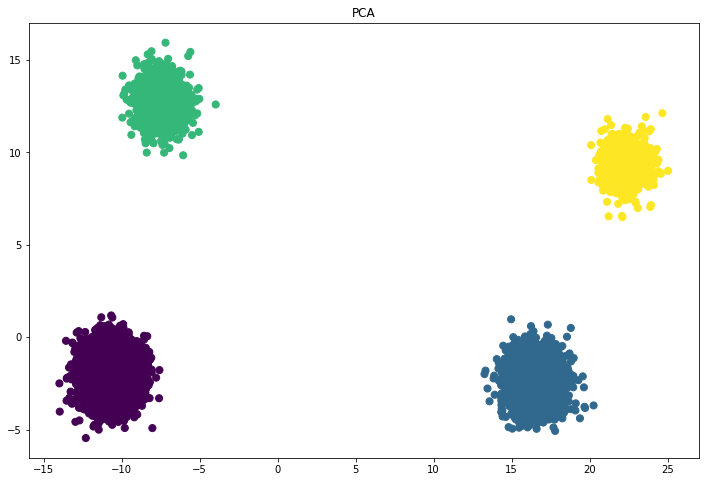

In [37]:
from sklearn.decomposition import PCA

# applying PCA and visualizing clusters
pca = PCA()
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

### Conclusion

In this project, we analyzed the relationship between features in the dataset and predicted Target. 
The given dataset is one of the classification tasks. To sum up, before applying any techniques, we performed data cleaning, shaping, and preparation, i.e.: checked for missing values, dropped unnecessary columns, converted data type for columns, etc. In order to encode categorical data into numerical, we used Label Encoder.